# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Employee Attrition Dataset](https://www.kaggle.com/datasets/personacarved/employee-attrition-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

/kaggle/input/employee-attrition-dataset/synthetic-dataset-generation.ipynb
/kaggle/input/employee-attrition-dataset/Employee_Attrition_DataSet.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Employee_Attrition_DataSet.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,EmployeeID,Age,Department,JobLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,OverTime,DistanceFromHome,PromotionLast5Years,PerformanceRating,TrainingHoursLastYear,Attrition
0,EMP0000,42,Sales,3,9,9866,4,1,No,24.5,Yes,4,19,No
1,EMP0001,36,Sales,3,7,8958,3,3,No,10.0,No,2,13,No
2,EMP0002,44,Sales,4,16,11716,4,3,No,4.0,No,4,13,No
3,EMP0003,53,Finance,4,30,17061,5,3,No,7.1,No,3,20,No
4,EMP0004,35,HR,2,4,5738,2,3,No,8.4,No,2,15,No


## last Five row

In [4]:
df.tail()

,EmployeeID,Age,Department,JobLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,OverTime,DistanceFromHome,PromotionLast5Years,PerformanceRating,TrainingHoursLastYear,Attrition
9995,EMP9995,51,Marketing,4,28,14510,4,1,No,14.0,No,3,17,No
9996,EMP9996,22,Engineering,1,0,5659,3,3,Yes,25.3,No,3,19,Yes
9997,EMP9997,30,Sales,1,0,4223,3,4,Yes,15.8,No,2,20,No
9998,EMP9998,42,Engineering,2,2,7990,5,3,No,5.7,No,3,25,No
9999,EMP9999,44,Sales,3,9,9829,1,4,Yes,6.2,Yes,2,23,No


## Shape of our dataset

In [5]:
df.shape

(10000, 14)

## List out all columns

In [6]:
df.columns

Index(['EmployeeID', 'Age', 'Department', 'JobLevel', 'YearsAtCompany',
       'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'OverTime',
       'DistanceFromHome', 'PromotionLast5Years', 'PerformanceRating',
       'TrainingHoursLastYear', 'Attrition'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

EmployeeID                object
Age                        int64
Department                object
JobLevel                   int64
YearsAtCompany             int64
MonthlyIncome              int64
JobSatisfaction            int64
WorkLifeBalance            int64
OverTime                  object
DistanceFromHome         float64
PromotionLast5Years       object
PerformanceRating          int64
TrainingHoursLastYear      int64
Attrition                 object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Department             10000 non-null  object 
 3   JobLevel               10000 non-null  int64  
 4   YearsAtCompany         10000 non-null  int64  
 5   MonthlyIncome          10000 non-null  int64  
 6   JobSatisfaction        10000 non-null  int64  
 7   WorkLifeBalance        10000 non-null  int64  
 8   OverTime               10000 non-null  object 
 9   DistanceFromHome       10000 non-null  float64
 10  PromotionLast5Years    10000 non-null  object 
 11  PerformanceRating      10000 non-null  int64  
 12  TrainingHoursLastYear  10000 non-null  int64  
 13  Attrition              10000 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ M

## Check Null Value

In [9]:
df.isnull().sum()

EmployeeID               0
Age                      0
Department               0
JobLevel                 0
YearsAtCompany           0
MonthlyIncome            0
JobSatisfaction          0
WorkLifeBalance          0
OverTime                 0
DistanceFromHome         0
PromotionLast5Years      0
PerformanceRating        0
TrainingHoursLastYear    0
Attrition                0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,Age,JobLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,DistanceFromHome,PerformanceRating,TrainingHoursLastYear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,37.693500,2.380800,7.788400,8967.918800,3.362100,2.761500,9.91074,2.603800,14.993100
std,9.376457,1.141368,7.141941,3500.745748,1.059951,0.893027,6.97463,0.737889,3.886227
min,22.000000,1.000000,0.000000,3000.000000,1.000000,1.000000,1.00000,1.000000,2.000000
25%,31.000000,1.000000,2.000000,6043.500000,3.000000,2.000000,4.70000,2.000000,12.000000
50%,37.000000,2.000000,6.000000,8670.000000,3.000000,3.000000,8.30000,3.000000,15.000000
75%,44.000000,3.000000,12.000000,11484.000000,4.000000,3.000000,13.40000,3.000000,18.000000
max,60.000000,5.000000,35.000000,21410.000000,5.000000,4.000000,50.00000,4.000000,31.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

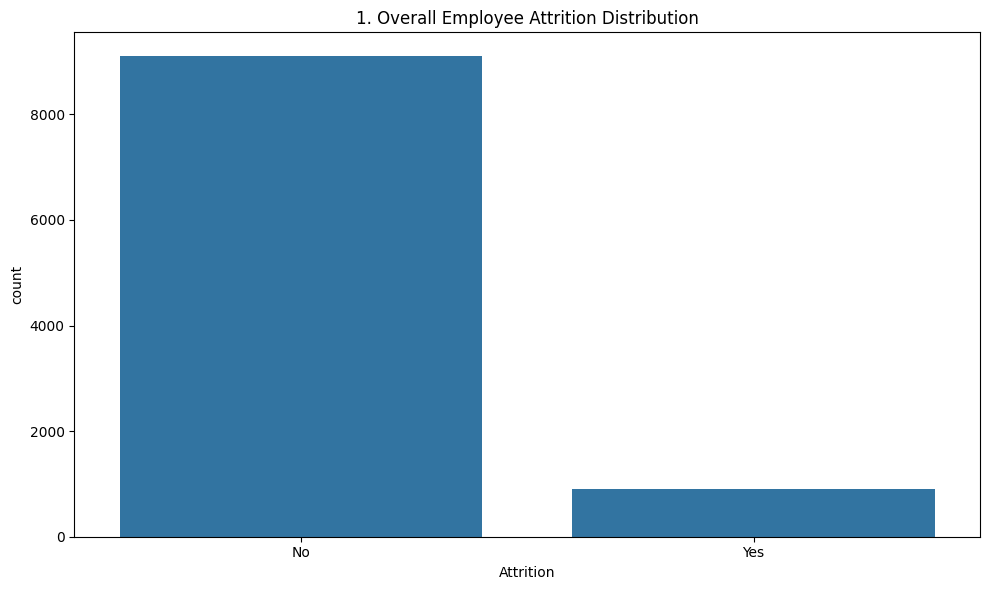

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Attrition")
plt.title(f'{plot_no}. Overall Employee Attrition Distribution')
show_fig()
plot_no += 1

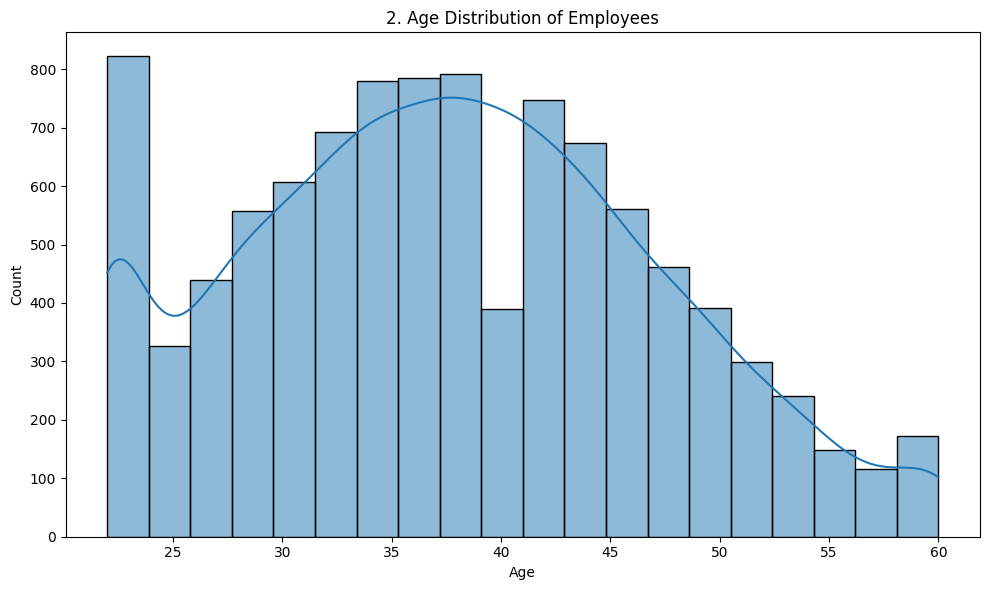

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", bins=20, kde=True)
plt.title(f'{plot_no}. Age Distribution of Employees')
show_fig()
plot_no += 1


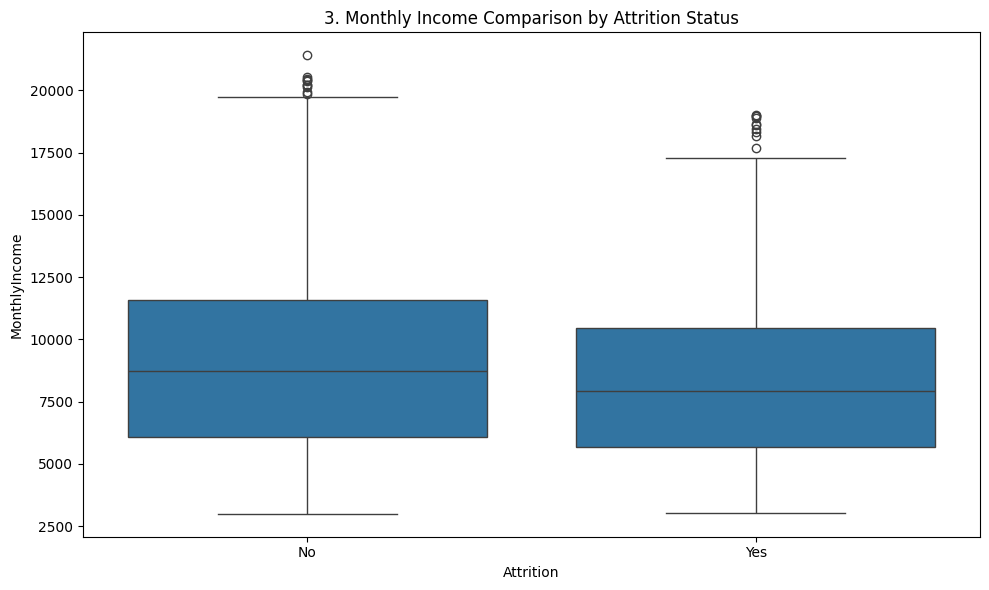

In [15]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title(f'{plot_no}. Monthly Income Comparison by Attrition Status')
show_fig()
plot_no += 1


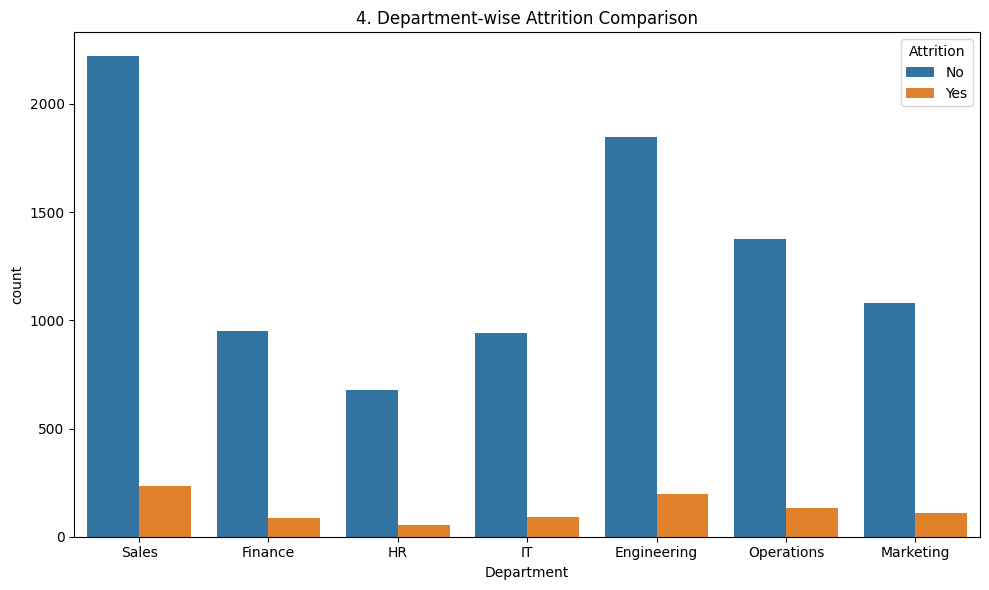

In [16]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title(f'{plot_no}. Department-wise Attrition Comparison')
show_fig()
plot_no += 1


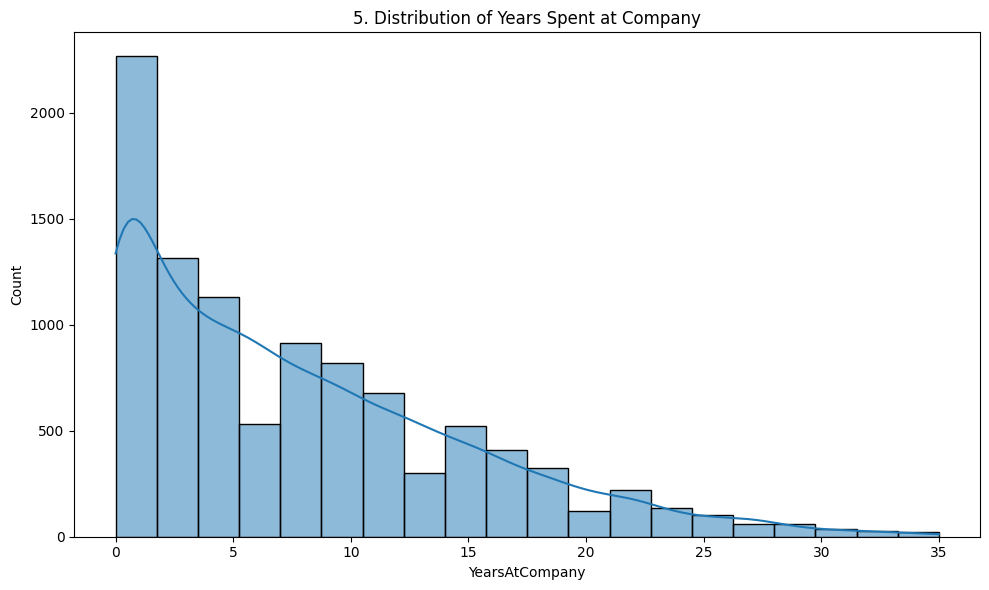

In [17]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x="YearsAtCompany", bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Years Spent at Company')
show_fig()
plot_no += 1


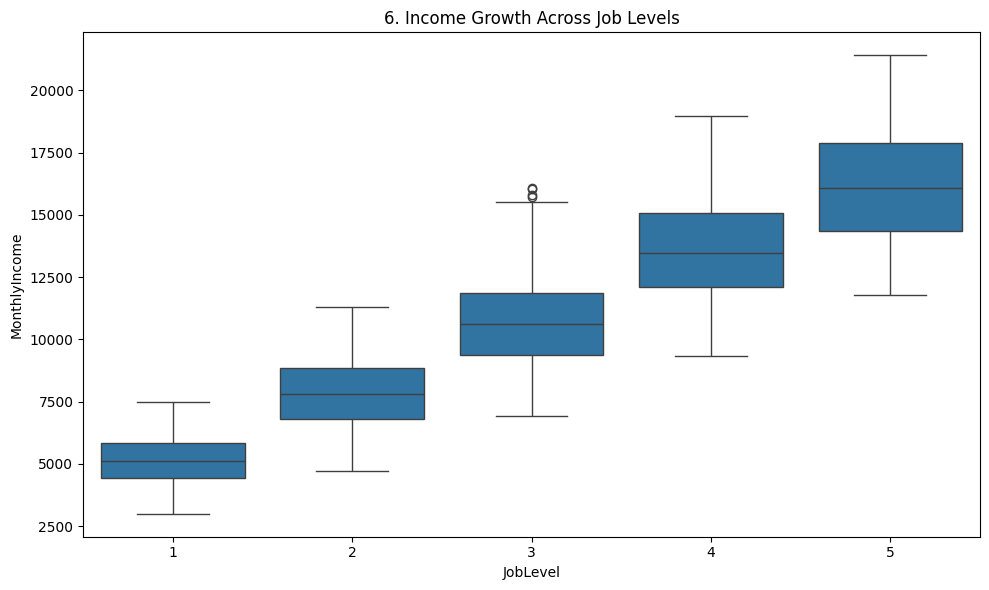

In [18]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="JobLevel", y="MonthlyIncome")
plt.title(f'{plot_no}. Income Growth Across Job Levels')
show_fig()
plot_no += 1


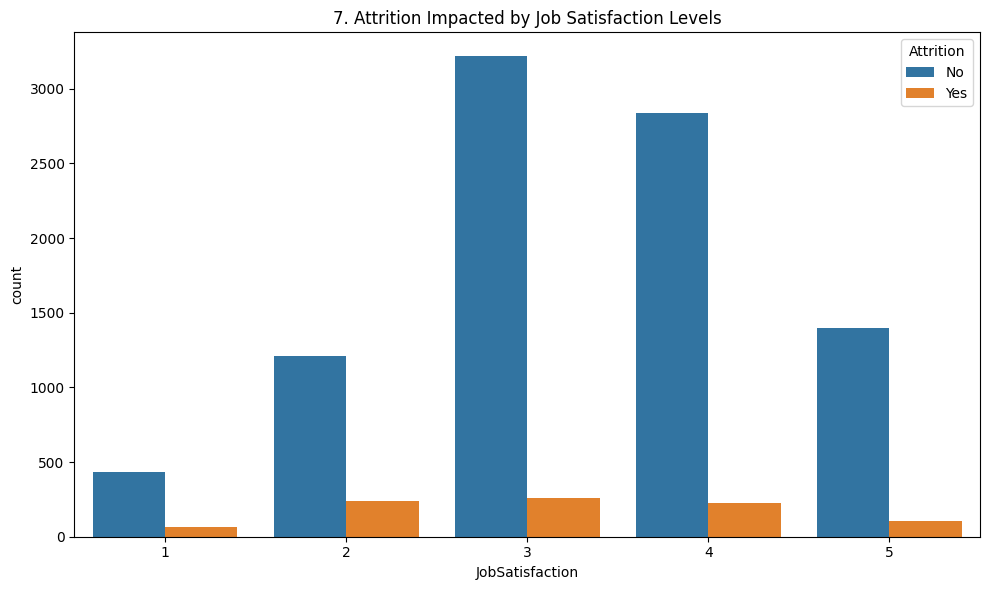

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition")
plt.title(f'{plot_no}. Attrition Impacted by Job Satisfaction Levels')
show_fig()
plot_no += 1


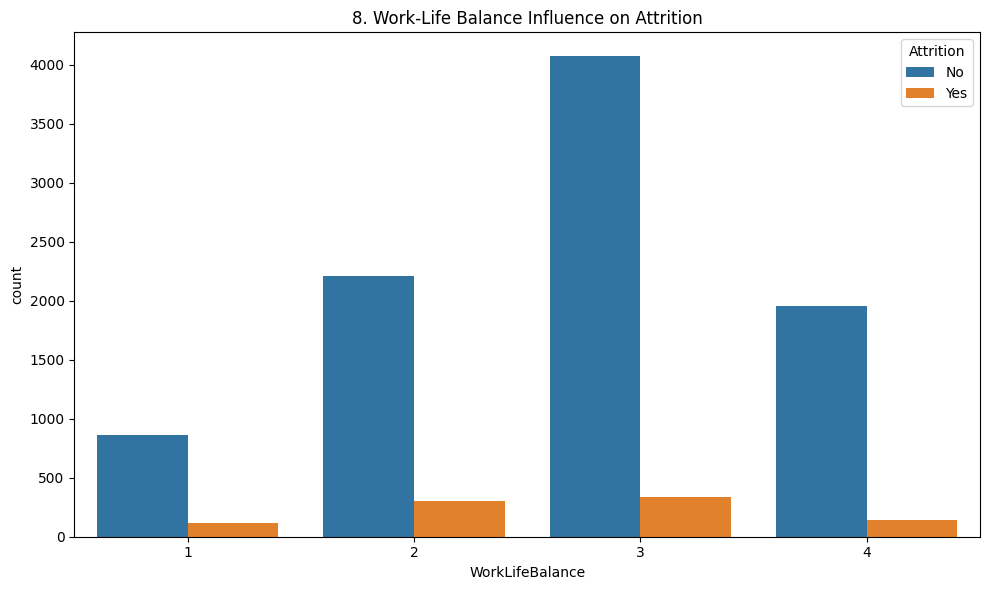

In [20]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="WorkLifeBalance", hue="Attrition")
plt.title(f'{plot_no}. Work-Life Balance Influence on Attrition')
show_fig()
plot_no += 1


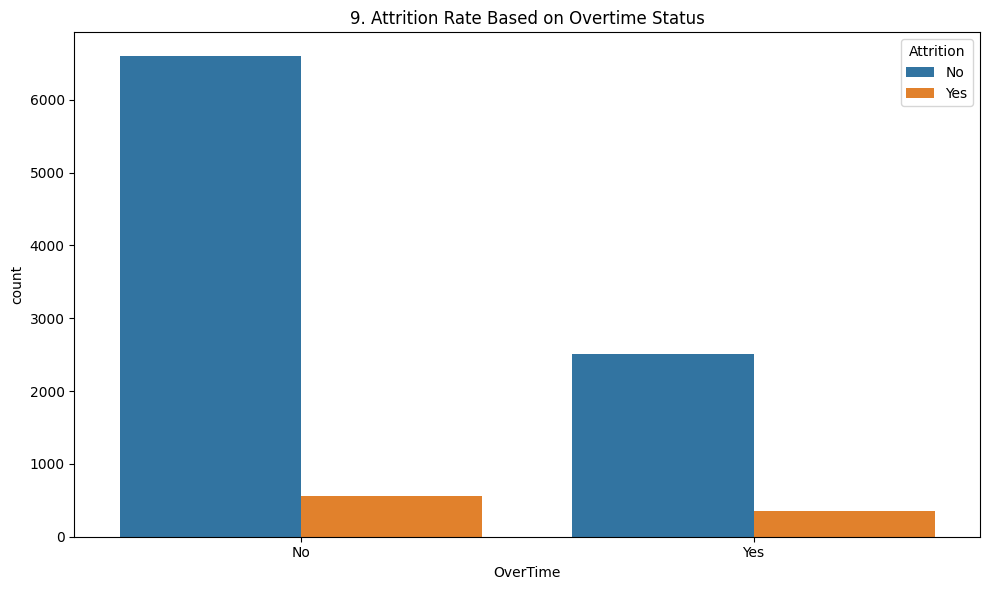

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="OverTime", hue="Attrition")
plt.title(f'{plot_no}. Attrition Rate Based on Overtime Status')
show_fig()
plot_no += 1


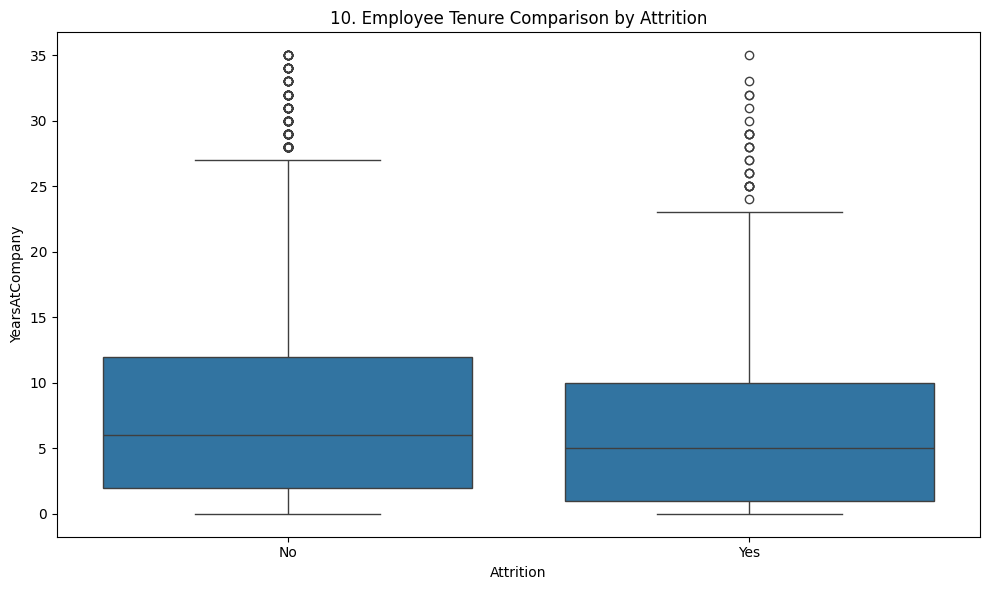

In [22]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Attrition", y="YearsAtCompany")
plt.title(f'{plot_no}. Employee Tenure Comparison by Attrition')
show_fig()
plot_no += 1


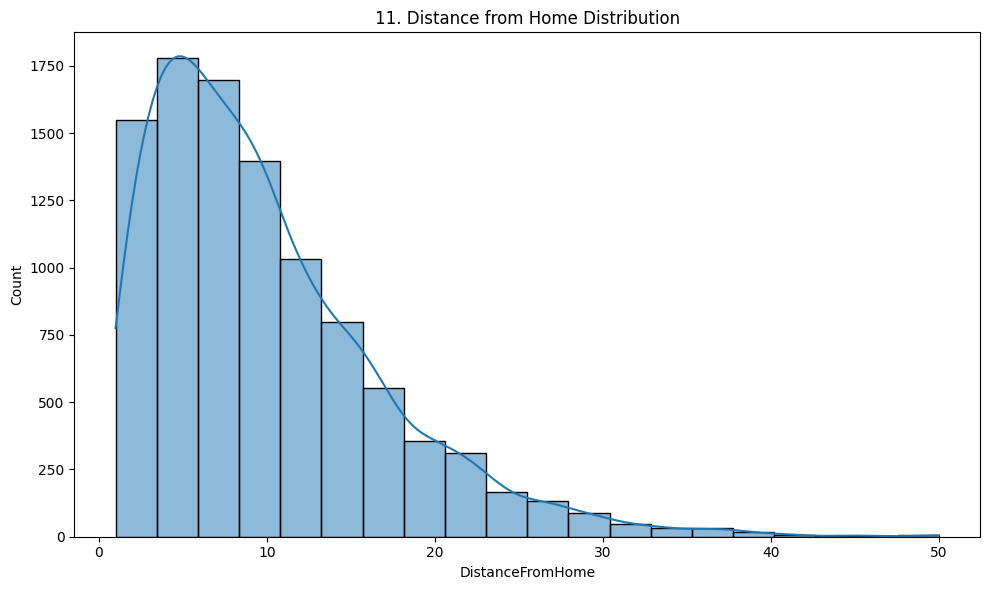

In [23]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x="DistanceFromHome", bins=20, kde=True)
plt.title(f'{plot_no}. Distance from Home Distribution')
show_fig()
plot_no += 1


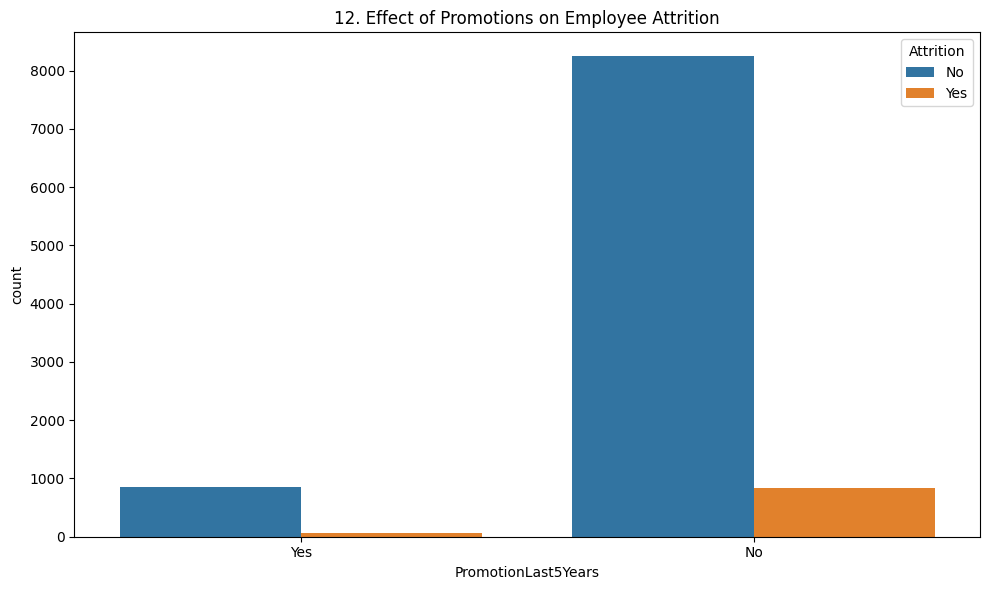

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="PromotionLast5Years", hue="Attrition")
plt.title(f'{plot_no}. Effect of Promotions on Employee Attrition')
show_fig()
plot_no += 1


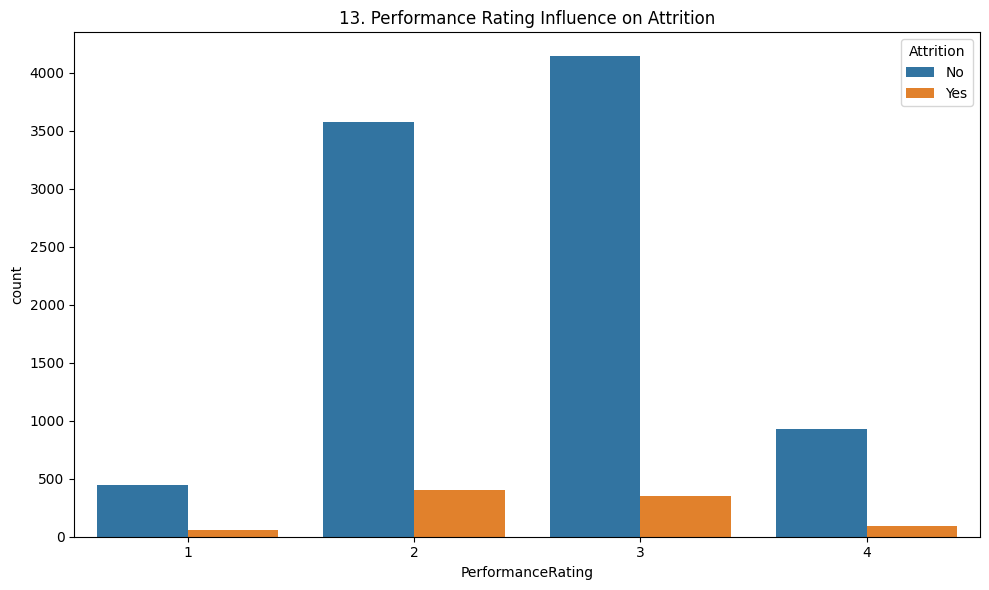

In [25]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="PerformanceRating", hue="Attrition")
plt.title(f'{plot_no}. Performance Rating Influence on Attrition')
show_fig()
plot_no += 1


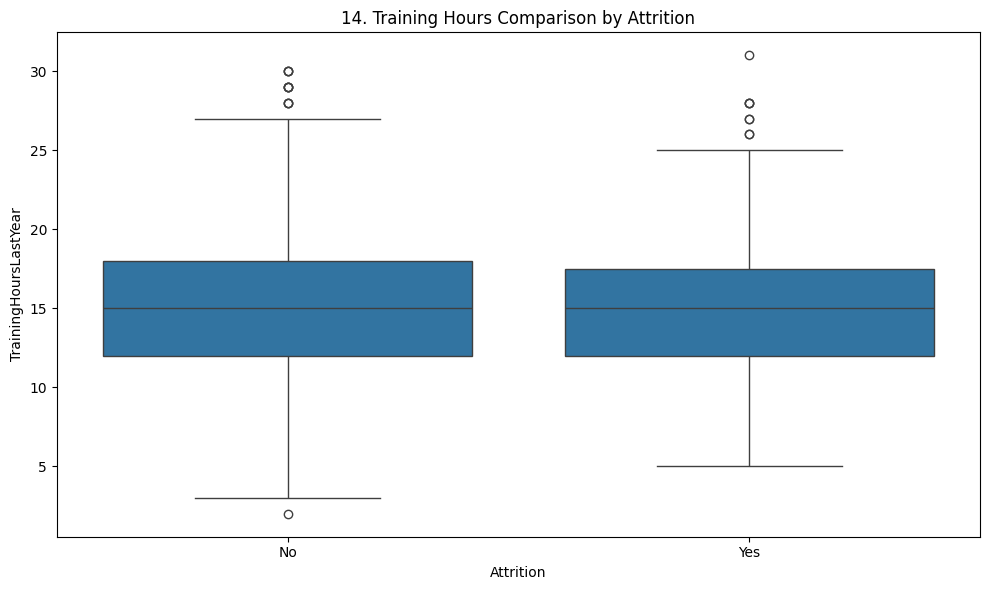

In [26]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Attrition", y="TrainingHoursLastYear")
plt.title(f'{plot_no}. Training Hours Comparison by Attrition')
show_fig()
plot_no += 1


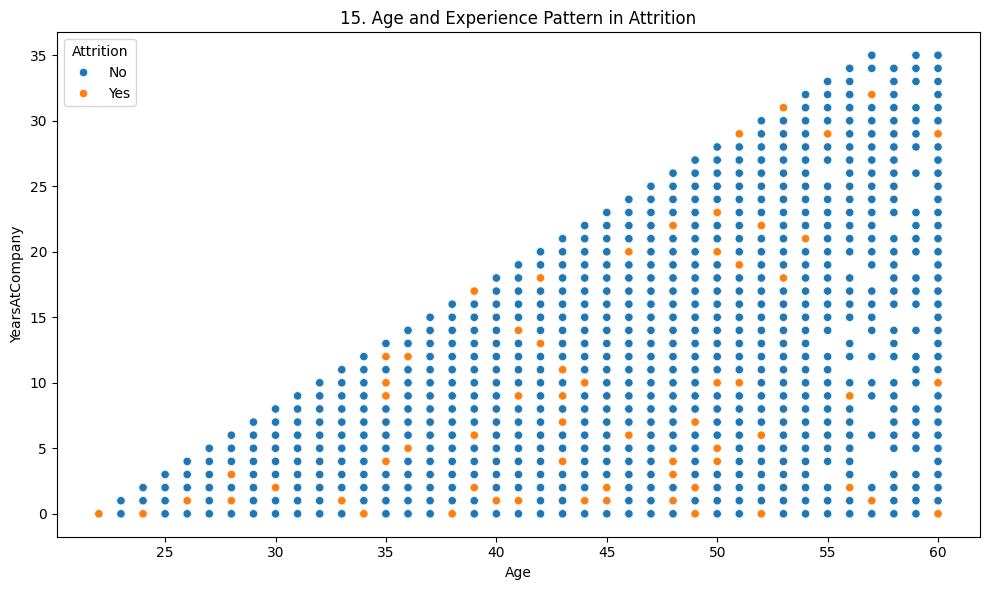

In [27]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Age", y="YearsAtCompany", hue="Attrition")
plt.title(f'{plot_no}. Age and Experience Pattern in Attrition')
show_fig()
plot_no += 1


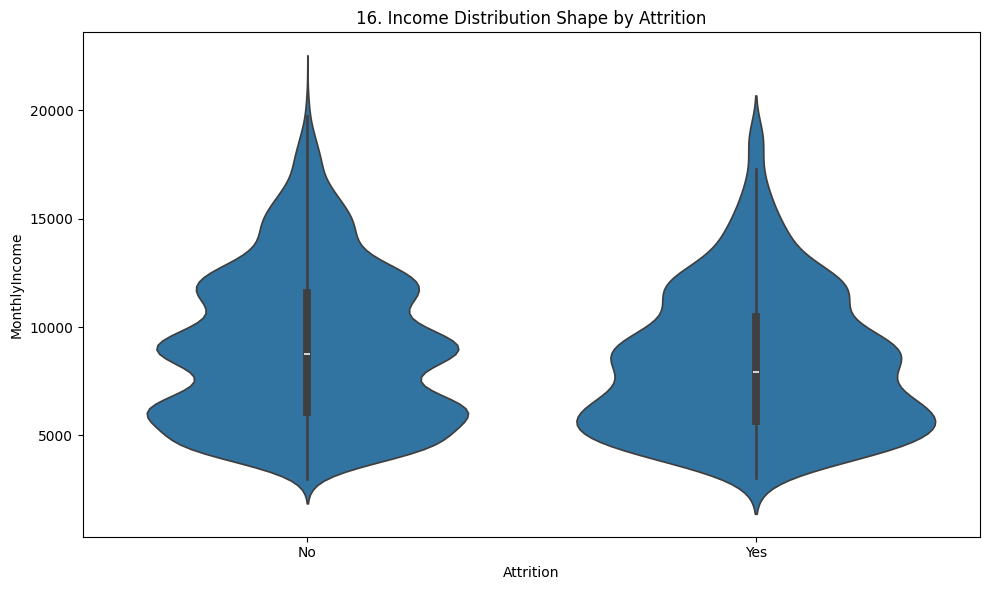

In [28]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title(f'{plot_no}. Income Distribution Shape by Attrition')
show_fig()
plot_no += 1


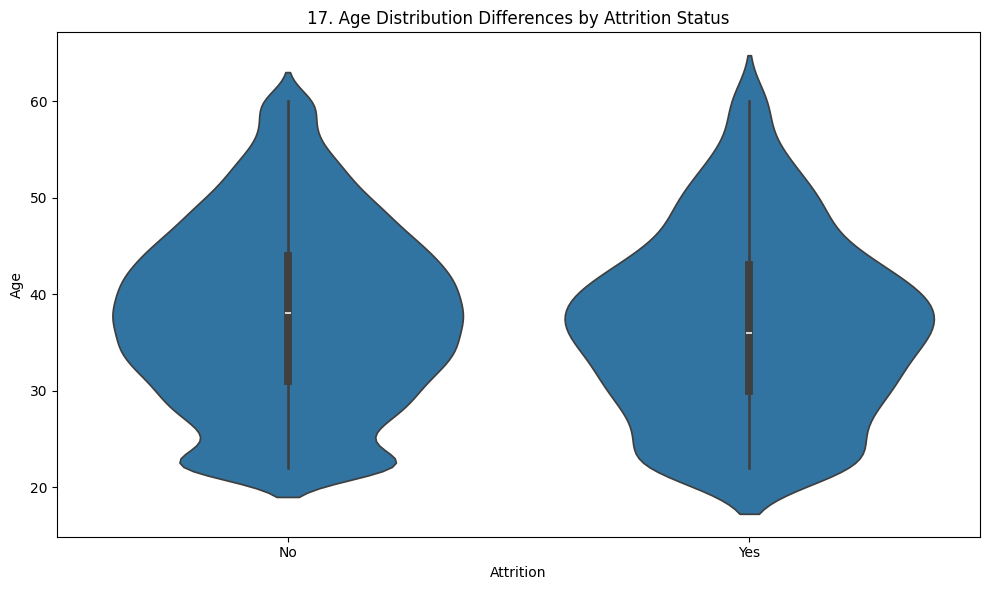

In [29]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Attrition", y="Age")
plt.title(f'{plot_no}. Age Distribution Differences by Attrition Status')
show_fig()
plot_no += 1


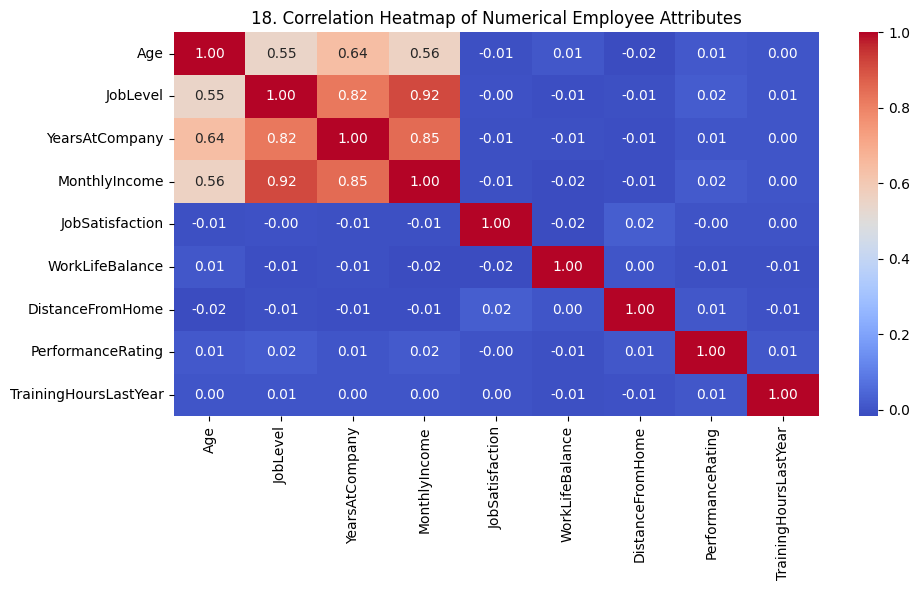

In [30]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f'{plot_no}. Correlation Heatmap of Numerical Employee Attributes')
show_fig()
plot_no += 1

# Model Training

## select features and target

In [31]:
X = df.drop(columns=["EmployeeID", "Attrition"])
X = pd.get_dummies(X, drop_first=True)
y = df["Attrition"].map({"Yes": 1, "No": 0})

## split data into train and test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## build pipeline with scaling and model

In [33]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

## train the model

In [34]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))])

## make predictions

In [35]:
y_pred = model.predict(X_test)

## print accuracy score

In [36]:
print("Model Accuracy:", accuracy_score(y_test, y_pred) * 100)

Model Accuracy: 90.64999999999999


## plot confusion matrix

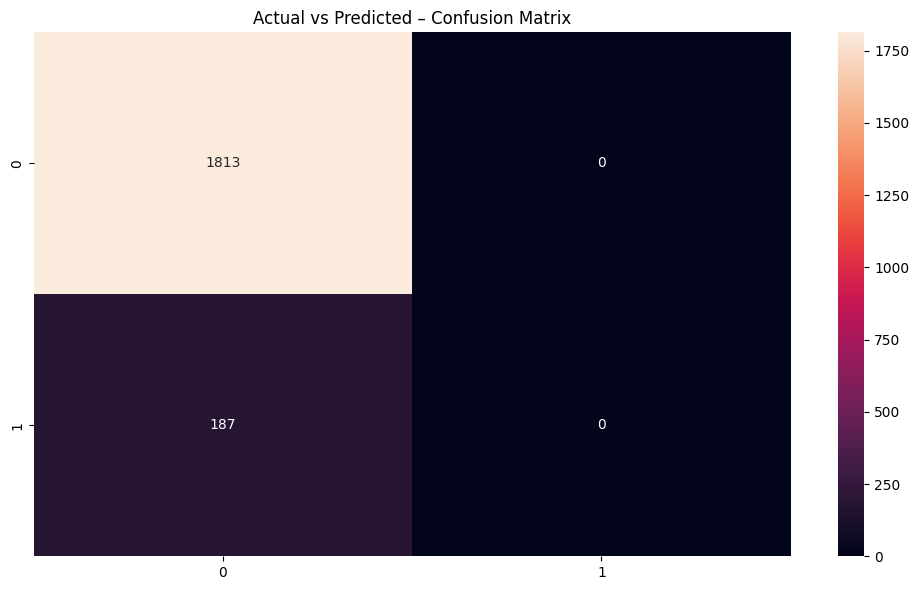

In [37]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Actual vs Predicted – Confusion Matrix")
show_fig()